In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [308]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [181]:
train.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [182]:
test.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333


In [186]:
print(test.shape)
print(train.shape)

(144844, 16)
(450000, 16)


In [184]:
train.columns.intersection(test.columns)

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time'],
      dtype='object')

In [185]:
train.drop(['reassignment_method','reassignment_reason','reassigned_order','cancelled_time'], inplace=True, axis=1)

In [309]:
def timeChange(df):
    df['allot_time'] = pd.to_datetime(df['allot_time'])
    df['accept_time'] = pd.to_datetime(df['accept_time'])
    df['accept_duration'] = df['accept_time'] - df['allot_time']
    df['accept_duration'] = pd.to_timedelta(df['accept_duration']).dt.total_seconds()
    return df

def totalDistance(df):
    df['total_distance'] = df['first_mile_distance'] + df['last_mile_distance']
    return df

def dropSamleValues(df):
    df.drop(['reassignment_method','reassignment_reason','reassigned_order','cancelled_time'], inplace=True, axis=1)

def dropUniqueValues(df):
    df.drop(['order_id','allot_time','accept_time','rider_id'], axis=1, inplace=True)
    return df

def dropNa(df):
    df.dropna(how='any',axis=0, inplace=True)
    return df
    
def order_time(df):
    df['order_time'] = pd.to_datetime(df['order_time'])
    df['order_time'] = pd.Series([val.time() for val in df['order_time']])
    df['order_time'] = pd.Series(val.strftime('%H') for val in df['order_time'])
    df['order_time'] = df['order_time'].astype(int)
    return df

In [219]:
test.drop(['reassignment_method','reassignment_reason','reassigned_order'], inplace=True, axis=1)

In [188]:
train = timeChange(train)
test = timeChange(test)

In [189]:
train.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,accept_duration
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,9.0
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,48.0
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,16.0
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,41.0
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,36.0


In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  object        
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  object        
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  object        
 6   delivered_time        444782 non-null  object        
 7   rider_id              450000 non-null  int64         
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [192]:
train.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,accept_duration
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,9.0
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,48.0
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,16.0
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,41.0
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,36.0


In [193]:
train.drop(['order_id','allot_time','accept_time','rider_id'], axis=1, inplace=True)

In [194]:
train.drop(['pickup_time','delivered_time'], axis=1, inplace=True)

In [214]:
test.drop(['order_id','allot_time','accept_time','rider_id'], axis=1, inplace=True)

In [239]:
train = order_time(train)

AttributeError: 'float' object has no attribute 'strftime'

In [195]:
train['session_time'].median()

175.55

In [196]:
train['session_time'].mean()

220.47477854328866

In [197]:
train['session_time'].value_counts().head(15)

0.066667      155
0.033333      144
0.116667      136
0.150000      132
0.050000      129
0.083333      124
240.000000    120
0.100000      118
0.133333      117
0.166667      117
0.016667      115
0.200000      113
0.233333      112
0.383333      111
0.433333      111
Name: session_time, dtype: int64

In [207]:
train['session.time'] = train.session_time.fillna(175.55)

In [209]:
train = dropNa(train)

<AxesSubplot:>

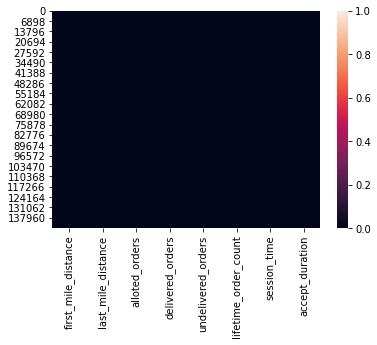

In [262]:
sns.heatmap(test.isna())

In [261]:
test.drop(['order_date','order_time'],axis=1, inplace=True)

In [221]:
test.session_time.median()

190.25833333333333

In [223]:
test.session_time = test.session_time.fillna(190.25833333333333)

In [226]:
test.alloted_orders.fillna(test.alloted_orders.median(), inplace=True)

In [227]:
test.delivered_orders.fillna(test.delivered_orders.median(), inplace=True)

In [228]:
test.undelivered_orders.fillna(test.undelivered_orders.median(), inplace=True)

In [230]:
cancelled_0  = train[train.cancelled == 0]

In [231]:
cancelled_1 = train[train.cancelled == 1]

In [232]:
cancelled_0

,order_time,order_date,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,accept_duration,session.time
1,2021-01-26 02:33:16,2021-01-26 00:00:00,2.520700,2.76,8.0,8.0,0,0.0,105.0,3.266667,48.0,3.266667
2,2021-01-26 02:39:49,2021-01-26 00:00:00,2.207400,4.80,1.0,1.0,0,0.0,66.0,9.816667,16.0,9.816667
3,2021-01-26 02:47:53,2021-01-26 00:00:00,2.189400,6.38,1.0,1.0,0,0.0,127.0,17.533333,41.0,17.533333
4,2021-01-26 03:06:30,2021-01-26 00:00:00,2.787000,4.01,34.0,34.0,0,0.0,84.0,1.350000,36.0,1.350000
7,2021-01-26 03:14:10,2021-01-26 00:00:00,0.025681,0.16,54.0,53.0,0,1.0,270.0,44.166667,6.0,44.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-02-06 10:03:16,2021-02-06 00:00:00,0.578900,0.19,4.0,4.0,0,0.0,127.0,369.516667,30.0,369.516667
449996,2021-02-06 10:03:17,2021-02-06 00:00:00,1.986300,1.19,81.0,81.0,0,0.0,105.0,239.133333,76.0,239.133333
449997,2021-02-06 10:03:18,2021-02-06 00:00:00,1.594400,1.61,28.0,28.0,0,0.0,1488.0,204.150000,33.0,204.150000
449998,2021-02-06 10:03:19,2021-02-06 00:00:00,2.893900,4.68,72.0,72.0,0,0.0,105.0,65.583333,142.0,65.583333


In [233]:
cancelled_1

,order_time,order_date,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,accept_duration,session.time
68,2021-01-26 03:45:17,2021-01-26 00:00:00,0.8617,2.63,13.0,13.0,1,0.0,168.0,5.000000,83.0,5.000000
100,2021-01-26 03:54:11,2021-01-26 00:00:00,2.9217,5.20,118.0,114.0,1,4.0,860.0,22.516667,55.0,22.516667
163,2021-01-26 04:11:37,2021-01-26 00:00:00,2.1287,0.45,55.0,52.0,1,3.0,256.0,92.916667,12.0,92.916667
295,2021-01-26 04:39:16,2021-01-26 00:00:00,1.6053,4.84,104.0,104.0,1,0.0,3282.0,9.833333,12.0,9.833333
317,2021-01-26 04:43:51,2021-01-26 00:00:00,2.0333,5.93,40.0,40.0,1,0.0,2635.0,113.100000,37.0,113.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
449731,2021-02-06 09:49:42,2021-02-06 00:00:00,1.7795,2.70,25.0,25.0,1,0.0,1307.0,252.683333,56.0,252.683333
449738,2021-02-06 09:50:15,2021-02-06 00:00:00,1.7963,2.00,215.0,214.0,1,1.0,975.0,88.983333,38.0,88.983333
449922,2021-02-06 09:59:19,2021-02-06 00:00:00,2.2022,2.56,89.0,88.0,1,1.0,176.0,174.616667,64.0,174.616667
449928,2021-02-06 09:59:27,2021-02-06 00:00:00,1.6601,7.50,314.0,312.0,1,2.0,437.0,282.183333,39.0,282.183333


In [271]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(x, y)

In [274]:
x_ros

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,accept_duration,session.time
0,2.520700,2.76,8.0,8.0,0.0,105.0,48.0,3.266667
1,2.207400,4.80,1.0,1.0,0.0,66.0,16.0,9.816667
2,2.189400,6.38,1.0,1.0,0.0,127.0,41.0,17.533333
3,2.787000,4.01,34.0,34.0,0.0,84.0,36.0,1.350000
4,0.025681,0.16,54.0,53.0,1.0,270.0,6.0,44.166667
...,...,...,...,...,...,...,...,...
850095,1.015400,2.26,60.0,60.0,0.0,458.0,9.0,353.100000
850096,2.469100,1.05,8.0,8.0,0.0,41.0,166.0,24.550000
850097,1.251500,1.37,68.0,67.0,1.0,583.0,122.0,212.466667
850098,2.573600,9.33,11.0,11.0,0.0,951.0,77.0,243.283333


In [297]:
test

,0,1,2,3,4,5,6,7
0,0.399344,0.924523,1.260780,1.265180,0.213187,-0.053498,0.208536,-0.355477
1,0.882996,1.634109,-0.593702,-0.588740,-0.710804,-0.498005,0.092727,-0.525706
2,0.082578,-1.013192,2.086251,2.106838,-0.710804,0.916877,0.034460,0.185250
3,0.687143,-0.139856,0.231769,0.207422,2.061169,0.127083,0.309302,-0.385518
4,-0.575231,-1.040484,2.798643,2.800636,1.137178,4.270525,0.065723,-0.015019
...,...,...,...,...,...,...,...,...
144839,0.116119,0.607938,-0.593702,-0.588740,-0.710804,-0.274429,-0.303271,-0.525706
144840,-0.636098,-0.674774,-0.107466,-0.122417,1.137178,-0.359758,0.050862,-0.275370
144841,0.857781,-0.865817,-0.311006,-0.304397,-0.710804,-0.468901,0.130243,0.055075
144842,-1.451300,1.448525,1.430398,1.413039,2.061169,0.615909,3.149341,-0.375504


In [307]:
test['7'].fillna(test['7'].median())

KeyError: '7'

In [273]:
x_ros.drop(['order_date','order_time','session_time'], axis=1, inplace=True)

In [294]:
x_ros.shape

(850100, 8)

In [295]:
y_ros.shape

(850100,)

In [263]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

In [264]:
def scale_numeric(df):
    x = df.values 
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

In [293]:
x_ros = scale_numeric(x_ros)
test = scale_numeric(test)

In [301]:
model = XG

In [310]:
preds = model.fit(x_ros, y_ros).predict(test)

c:\users\shvmt\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: could not convert string to float: '2021-02-06 10:03:24'

In [277]:
type(preds)

numpy.ndarray

In [278]:
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts))

{0: 63919, 1: 80925}

In [282]:
test2 = pd.read_csv('test.csv')

In [283]:
order_id = test2['order_id']

In [279]:
preds = pd.Series(preds)

In [280]:
preds.value_counts()

1    80925
0    63919
dtype: int64

In [284]:
ans = pd.concat([order_id,preds], axis=1)

In [286]:
ans.rename(columns={0:'cancelled'}, inplace=True)

In [287]:
ans

,order_id,cancelled
0,130231,0
1,130232,1
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,0
144840,41185,0
144841,41186,0
144842,41187,0


In [290]:
ans.to_csv('ans7.csv', index=False)

In [289]:
ans.columns

Index(['order_id', 'cancelled'], dtype='object')